# Link prediction using networkX library

## Import required libraries

In [2]:
import networkx as nx
import random
from operator import itemgetter
import matplotlib.pyplot as plt

## Read and plot Graph

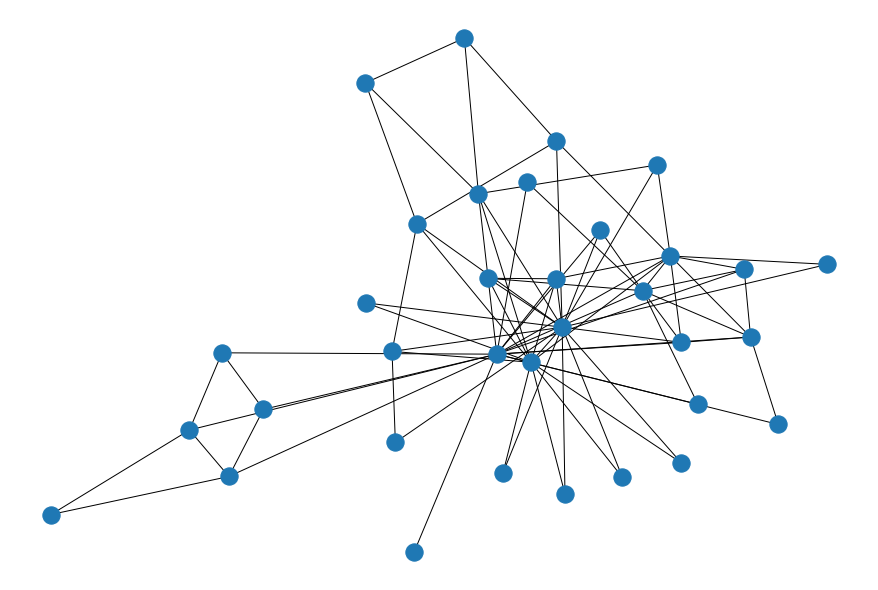

In [3]:
graph = nx.karate_club_graph()
plt.figure(figsize=(12,8))
nx.draw(graph)

## Plot Graph statistics

In [4]:
n = graph.number_of_nodes()
m = graph.number_of_edges()
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges:  {graph.number_of_edges()}")
print(f"Number of connected components: {nx.number_connected_components(graph)}")

Number of nodes: 34
Number of edges:  78
Number of connected components: 1


## Remove random edge sample (15%) from graph

In [5]:
# Take a random sample of edges
num_removed_edges = int(0.15 * graph.number_of_edges())
edge_subset = random.sample(graph.edges(), num_removed_edges)
# Remove some edges
graph_train = graph.copy()
graph_train.remove_edges_from(edge_subset)
print(f"Number of edges: {graph_train.number_of_edges()}")
print(f"Number of removed edges: {num_removed_edges}")

Number of edges: 67
Number of removed edges: 11


## Print sample graph (same number of nodes, 15% of the original edges were removed)

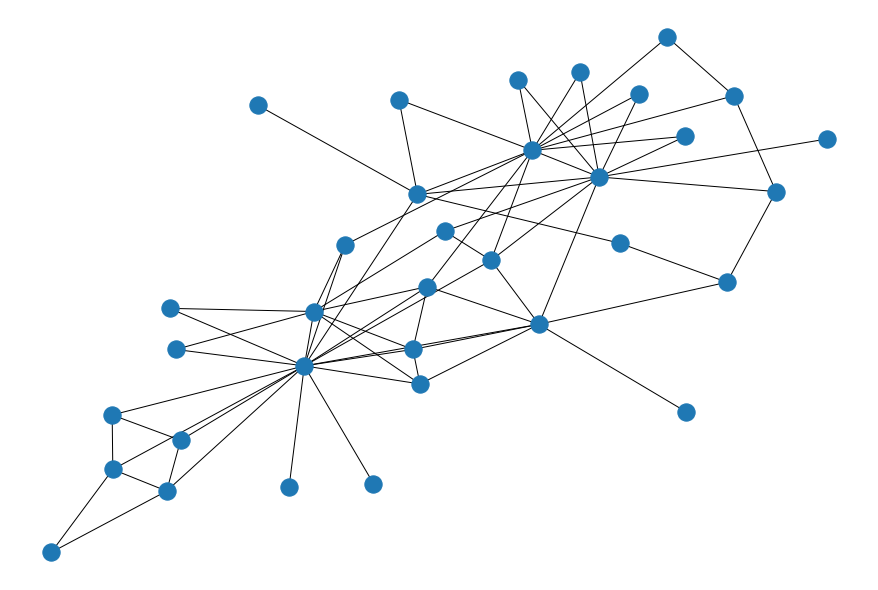

In [6]:
plt.figure(figsize=(12,8))
nx.draw(graph_train)

# Predicting the removed edges

In [7]:
prediction_adamic = list(nx.adamic_adar_index(graph_train))
sorted_pred = sorted(prediction_adamic,key=itemgetter(2), reverse=True)
top_predictions = sorted_pred[:num_removed_edges]
top_predictions

[(0, 33, 2.7110197222973085),
 (1, 2, 2.3246911497859464),
 (4, 5, 1.9922605072935597),
 (6, 10, 1.9922605072935597),
 (7, 13, 1.9438053887078284),
 (0, 32, 1.660343908073847),
 (2, 33, 1.6597022605434701),
 (1, 33, 1.531574161186449),
 (0, 16, 1.4426950408889634),
 (27, 31, 1.4426950408889634),
 (27, 32, 1.391137573589825)]

## Calculate prediction accuracy (comparing removed edges with top predicted)

In [8]:
prediction_result = [((u,v) in edge_subset) for (u,v,s) in top_predictions]
print(f"Correctly predicted: {sum(prediction_result)}")
accuracy = (sum(prediction_result)) / len(prediction_result)
print(f"Accuracy: {accuracy}")

Correctly predicted: 1
Accuracy: 0.09090909090909091
